## Mandelbrot Menge

Konvergenzuntersuchung der komplexen Funktion

$f(z) = z^2 + c$


$z_0 = 0$

$z_{n+1} = z_n^2 +c$

https://karmeleon.github.io/WGL-fractal/

In [34]:
from matplotlib import rc
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def quadf(z,c):
    return z**2+c

In [43]:
# Evaluationg Series with 
c = 0.3 + 0.3j

val = []
z = 0+0j

for i in range(30):
    val.append(z)
    z = quadf(z,c)

val

[0j,
 (0.3+0.3j),
 (0.3+0.48j),
 (0.1596+0.588j),
 (-0.02027183999999993+0.48768959999999995j),
 (0.06256980154882563+0.28022726891827204j),
 (0.22538765782046585+0.33506752920957134j),
 (0.23852934716718843+0.4510401712404716j),
 (0.15345901338737117+0.5151726351843331j),
 (0.058146824747055376+0.45811576863911974j),
 (0.09351099575235328+0.35327595462584294j),
 (0.183940406209796+0.3660703725848515j),
 (0.19982655535221275+0.43467026606925785j),
 (0.1509924120192115+0.4737173239652992j),
 (0.09839060546253509+0.4430554427216135j),
 (0.11338258591803926+0.38718498652570216j),
 (0.16294339699855337+0.38780007000185057j),
 (0.17616165633198794+0.42637892152475665j),
 (0.14923394444101482+0.4502232340816956j),
 (0.1195698096664426+0.4343771782020035j),
 (0.1256134064409342+0.40387679304211993j),
 (0.15266226391970794+0.40146467951292175j),
 (0.16213187792867756+0.42257701371648526j),
 (0.147715413319137+0.4370264096066926j),
 (0.13082776063832682+0.42911107345286215j),
 (0.13297958959377

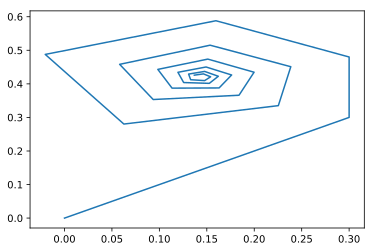

In [44]:
##
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib import pyplot as plt

x = [z.real for z in val]
y = [z.imag for z in val]

plt.plot(x,y)

In [62]:
#Karte
xmin=-2.0
xmax=1.0
ymin=-1.25
ymax=1.25

#Karte
xmin= 0.35
xmax= 0.38
ymin= -0.63
ymax= -0.60

maxiterations=np.uint64(5000)

w = round((xmax-xmin)*200000)
h =  round((ymax-ymin)*200000)

In [57]:
import numba
print(numba.__version__)

@numba.jit("uint64(complex128,uint64)", nopython=True, nogil=True)
def mandel(c, maxiterations):
    z=c
    for iteration in range(maxiterations):
        if abs(z)>2.0:
            return iteration+1
        z=z**2+c
    return maxiterations

0.38.0


In [48]:
l = [10,9,8,7,5,6]
for i,z in enumerate(l):
    print (i,z)

0 10
1 9
2 8
3 7
4 5
5 6


In [63]:

def calc_map(xmin,xmax,ymin,ymax,w,h):
    x=np.linspace(xmin, xmax, w, dtype=np.float64)
    y=np.linspace(ymin, ymax, h, dtype=np.float64)
    img = np.zeros((h,w))
    
    for i, x_ in enumerate(x):
        for j, y_ in enumerate(y):
            c = x_ + 1.0j*y_
            img[j,i]=mandel(c,5000);
    return np.log(img)

img = calc_map(xmin,xmax,ymin,ymax,w,h)


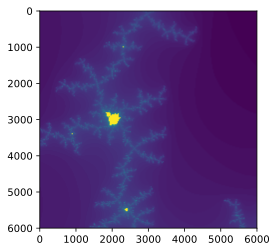

In [64]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [12]:
img

array([[14., 14., 14., ..., 31., 31., 23.],
       [14., 14., 14., ..., 24., 24., 21.],
       [14., 14., 14., ..., 21., 21., 21.],
       ...,
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.]])

## Julia Menge

In [91]:
import numba
print(numba.__version__)

@numba.jit("uint64(complex128,complex128,uint64)", nopython=True, nogil=True)
def julia(z,c, maxiterations):
    for iteration in range(maxiterations):
        if abs(z)>2.0:
            return iteration+1
        z=z**2+c
    return maxiterations

0.38.0


In [102]:
def calc_map(xmin,xmax,ymin,ymax,w,h):
    x=np.linspace(xmin, xmax, w, dtype=np.float64)
    y=np.linspace(ymin, ymax, h, dtype=np.float64)
    img = np.zeros((h,w))
    c = 0.44+0.7j
    for i, x_ in enumerate(x):
        for j, y_ in enumerate(y):
            z = x_ + 1.0j*y_
            img[j,i]=julia(z,c,5000);
    return np.log(img)



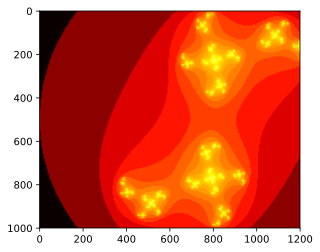

In [103]:
## Karte
xmin=-2.0
xmax=1.0
ymin=-1.25
ymax=1.25

#Karte
#xmin= 0.22
#xmax= 0.28
#ymin= -0.67
#ymax= -0.63

maxiterations=np.uint64(5000)

w = round((xmax-xmin)*400)
h =  round((ymax-ymin)*400)

img = calc_map(xmin,xmax,ymin,ymax,w,h)

import matplotlib.pyplot as plt
#plt.imshow(img, cmap='viridis')
plt.imshow(img, cmap='hot')
#plt.imshow(img, cmap='inferno')
#plt.imshow(img, cmap='flag')

# Fermat-Punkt Visualisieren

In [31]:
from math import *

def distanz(a,b):
    return sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
    

def schwerpunkt(punkte):
    x0=y0=0.0
    n = len(punkte)
    for P in punkte:
        x0=x0+P[0]
        y0=y0+P[1]
    return (x0/n,y0/n)



def WeiszmanIteration(P, punkte):
    """
    Return a new approximation to the geometric median 
    of `points` by applying one iteration of Weiszfeld's 
    algorithm to the old appromixation P.
    """
    W = x = y = 0.0
    for Q in punkte:
        d = distanz(P, Q)
        if d != 0:
            w = 1.0 / d
            W += w
            x += Q[0] * w
            y += Q[1] * w
    return x / W, y / W


def fermatpunkt(punkte, epsilon):
    """
    Return an approximation to the geometric median for 
    `points`. Start with the centroid and apply Weiszfeld's 
    algorithm until the distance between steps is less 
    than `epsilon`.
    """
    P = schwerpunkt(punkte)
    while True:
        Q = WeiszmanIteration(P, punkte)
        if distanz(P, Q) < epsilon:
            return Q
        P = Q
        
# Initialisierung der Punkte A-F        
Punkte = []
A = [3,10]
Punkte.append(A)    
B = [-5.4,-40]
Punkte.append(B) 
C = [6,10]
Punkte.append(C) 
D = [6,6]
Punkte.append(D) 
E = [10,7]
Punkte.append(E) 
F = [4,7]
Punkte.append(F) 

print(Punkte)
print(schwerpunkt(Punkte))   
print(distanz(C,D))  
print(WeiszmanIteration(F,Punkte))  
print(fermatpunkt(Punkte, 0.01)) 

[[3, 10], [-5.4, -40], [6, 10], [6, 6], [10, 7], [4, 7]]
(3.9333333333333336, 0.0)
4.0
(5.5767723802190305, 7.287334633716146)
(5.290593515832026, 6.978329345112028)


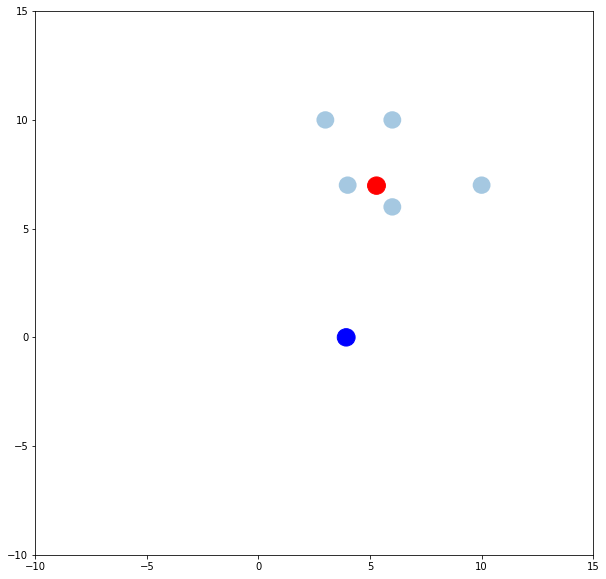

In [32]:
import matplotlib.pyplot as plt
import numpy as np;
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots(figsize=(10, 10))

#plt.axis([-10,15,-10,15])

plt.xlim(-10,15)
plt.ylim(-10,15)

patches = []
for P in Punkte:
    circle = Circle(P, 0.4)
    patches.append(circle)
p = PatchCollection(patches, alpha=0.4)
ax.add_collection(p)


cm = Circle(schwerpunkt(Punkte), 0.4,color='b')
ax.add_artist(cm)


fp = Circle(fermatpunkt(Punkte, 0.01), 0.4, color='r')
ax.add_artist(fp)

plt.plot([],[])



## Hilbert-Kurve

In [104]:
import numpy as np;

def hilbert_curve(n):
    ''' Generate Hilbert curve indexing for (n, n) array. 'n' must be a power of two. '''
    # recursion base
    if n == 1:  
        return np.zeros((1, 1), np.int32)
    # make (n/2, n/2) index
    t = hilbert_curve(n//2)
    # flip it four times and add index offsets
    a = np.flipud(np.rot90(t))
    b = t + t.size
    c = t + t.size*2
    d = np.flipud(np.rot90(t, -1)) + t.size*3
    # and stack four tiles into resulting array
    return np.vstack(map(np.hstack, [[a, b], [d, c]]))

In [114]:
hilbert_curve(4)

array([[ 0,  3,  4,  5],
       [ 1,  2,  7,  6],
       [14, 13,  8,  9],
       [15, 12, 11, 10]], dtype=int32)

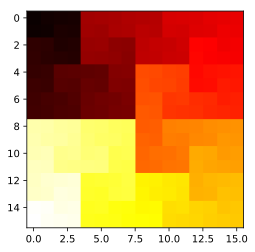

In [118]:
import matplotlib.pyplot as plt
plt.imshow(hilbert_curve(16), cmap='hot',interpolation='nearest')

In [128]:
idx = hilbert_curve(4)
#print(idx)
#idx.ravel()
y,x =np.indices(idx.shape).reshape(2, -1)
print(x)
x[idx.ravel()], y[idx.ravel()] = x.copy(), y.copy()

print(x)

[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3]
[0 0 1 1 2 3 3 2 2 3 3 2 1 1 0 0]


(-1, 66)

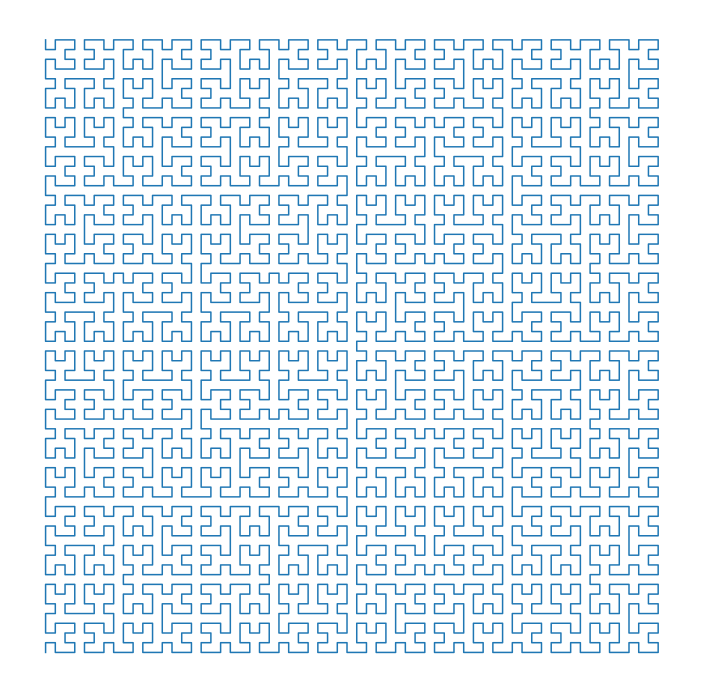

In [142]:
from matplotlib import rc
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

idx = hilbert_curve(64)
y, x = np.indices(idx.shape).reshape(2, -1)
x[idx.ravel()], y[idx.ravel()] = x.copy(), y.copy()


fig, ax = plt.subplots(figsize=(12, 12))
plt.plot(x, y)
plt.axis('equal')
plt.axis('off')
plt.ylim(-1, 66)
plt.xlim(-1, 66)

## L-Systeme  / Koch-Kurve
from https://github.com/senderle/lsystem-notebook/blob/master/LSystems.ipynb

In [1]:
# Define a rule System for L-Systeme

from math import pi, sin, cos
from collections import Sequence
from pprint import pprint

class Lsystem(Sequence):
    """A class representing an abstract sequence of lsystem iterations."""
    def __init__(self, start, rules, max_iters=5, angle=90, bindings={}):
        self.start = start
        self.rules = rules
        self.max_iters = max_iters
        self._cache = []
        self._bindings = {}
        self.set_default_bindings(angle)
        if bindings:
            self.set_bindings(bindings)

    @classmethod
    def from_lsbot(cls, start, rules, a=90, iter=5, wiggly=None, bindings={}):
        """Designed to accept the lsystem representation used by the LSystem Bot,
           which is why it masks the `iter` built-in."""
        return cls(start, rules, iter, a, bindings=bindings)
        
    def set_default_bindings(self, angle=90):
        self.bind_push('[')
        self.bind_pop(']')
        self.bind_turn('+', angle)
        self.bind_turn('-', -angle)
        self.bind_step('F', 1)
        
    def set_bindings(self, bindings):
        self._bindings.update(bindings)
    
    def get_bindings(self):
        return self._bindings
    
    def bind_push(self, char):
        self._bind('push', char)

    def bind_pop(self, char):
        self._bind('pop', char) 
        
    def bind_turn(self, char, arg):
        self._bind('turn', char, arg)
    
    def bind_step(self, char, arg):
        self._bind('step', char, arg)
    
    def _bind(self, action, char, arg=None):
        self._bindings[char] = (action, arg)
        
    def interpret(self, ix):
        state = self[ix]
        position = (0, 0)
        heading = 0
        stack = []
        points = [[position]]
        for c in state:
            if c not in self._bindings:
                continue
            method, arg = self._bindings[c]
            if method == 'push':
                stack.append((position, heading))
            elif method == 'pop':
                position, heading = stack.pop()
                points.append([position])
            elif method == 'turn':
                heading += arg
            elif method == 'step':
                x, y = position
                x += arg * cos(pi * heading / 180)
                y += arg * sin(pi * heading / 180)
                position = x, y
                points[-1].append(position)

        return points

    @staticmethod
    def lsystem_step(state, rules):
        lstring_subs = [rules[c] if c in rules else c
                        for c in state]
        return ''.join(lstring_subs)

    def __len__(self):
        return self.max_iters

    def __getitem__(self, ix):
        if -self.max_iters <= ix < 0:
            ix = self.max_iters - ix

        last = len(self._cache)
        if last <= ix < self.max_iters:
            state = self._cache[-1] if self._cache else self.start
            for n in range(last, ix + 1):
                state = self.lsystem_step(state, self.rules)
                self._cache.append(state)

        return self._cache[ix]

In [2]:
#Output with Matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib import pyplot as plt

def plot_series(series, 
                colormap='viridis',  # 'plasma' also good
                linewidth=0.25,
                clearfig=True,
                savefig=False):
    if clearfig:
        plt.clf()
    minx = min(x for X, Y in series for x in X)
    miny = min(y for X, Y in series for y in Y)
    maxx = max(x for X, Y in series for x in X)
    maxy = max(y for X, Y in series for y in Y)
    padding = (maxx - minx) * 1.0 / 10
    minx -= padding
    miny -= padding
    maxx += padding
    maxy += padding
    pref=[]
    cmap = plt.get_cmap(colormap)
    colors = [cmap(i * 1.0 / len(series)) for i in range(len(series))]
    for i, (x, y) in enumerate(series):
        plt.plot(x, y, linewidth=linewidth, color=colors[i])
        

    plt.xlim((minx, maxx))
    plt.ylim((miny, maxy))
    ax = plt.gca()
    ax.set_aspect('equal')
    if savefig:
        if isinstance(savefig, basestring):
            plt.savefig('{}.pdf'.format(savefig))
        else:
            plt.savefig('untitled.pdf')

In [3]:
### classic-rules
# Straight from LsystemBot 2.0:
star = {"start":"M",
        "rules":{"F":"[[FF]M]","M":"MFMF+"},"a":60,"iter":10}
kite_thing = {"start":"GFGF",
              "rules":{"F":"+[-]","G":"GFFGFF"},"a":36,"iter":10}
triangle_plant = {"start":"GEE",
                  "rules":{"F":"[]+D+","D":"-D-GG-EFF","G":"E","E":"F[GFE++]DF"},"a":60,"iter":10}
plant = {'start': 'X', 
         'rules': {'X': 'F−[[X]+X]+F[+FX]−X', 'F': 'FF'}, 'a': 25, 'iter': 10}
wright = {"start":"LLLF",
          "rules":{"F":"FF","L":"-FFXF-XL","X":"F[F-]FXL"},"a":90,"iter":10}
swirl = {"start":"FFFF",
         "rules":{"F":"[FS----E]-","E":"[]F-F+-[+]","S":"[[+]F]F"},"a":36,"iter":10}
rand_koch = {"start":"FFU",
             "rules":{"F":"J+J--FF","U":"-F","J":"-"},"a":60,"iter":10}
squiggle = {"start":"PA",
            "rules":{"F":"+F","P":"-F[+P]","A":"AAF++--F","W":"[F]FF+"},"a":36,"iter":10}
lattice = {"start":"NFF",
           "rules":{"F":"F+F++","N":"-+NFF","L":"[[]]FLL-FFF"},"a":60,"iter":10}
curl = {u'a': 45, u'iter': 12, 
        u'rules': {u'F': u'TFFT', u'G': u'[-F]-', u'T': u'[---]-'}, u'start': u'FTT', u'wiggly': True}
parquetblob = {
    u'a': 90,
    u'iter': 7,
    u'rules': {u'E': u'+[E]',
               u'F': u'EF[E]FWE+F',
               u'Q': u'[[+][]]',
               u'W': u'[[WF]]Q'
              },
    u'start': u'QFEQ'
}
hexcomb = {u'a': 60,
 u'iter': 9,
 u'rules': {u'H': u'JJFJYFR+',
            u'J': u'[]F[FFY]',
            u'R': u'H',
            u'Y': u'F-FJF+JJ'},
 u'start': u'FY',
 u'wiggly': True}
tilefloor = {u'a': 90,
 u'iter': 18,
 u'rules': {u'K': u'FF-KK-F+-', u'Y': u'F'},
 u'start': u'K'}
embryo = {u'a': 90,
 u'iter': 8,
 u'rules': {u'F': u'[-]-F[F]+F'},
 u'start': u'UUUF',
 u'wiggly': True}
funnybox = {u'a': 90,
 u'iter': 10,
 u'rules': {u'A': u'[]U[AA]F+F', u'F': u'FF', u'U': u'U'},
 u'start': u'AU'}
suasages = {u'a': 60,
 u'iter': 9,
 u'rules': {u'F': u'F-F', u'M': u'SMM+FFF', u'S': u'+FFS-'},
 u'start': u'SSSF',
 u'wiggly': True}
hexfill_a = {u'a': 60,
 u'iter': 9,
 u'rules': {u'F': u'NF+F', u'N': u'F++'},
 u'start': u'NFF'}
furball = {u'a': 60,
 u'iter': 6,
 u'rules': {u'F': u'F[O+]M-', u'M': u'-FOMF', u'O': u'F[-]OFO+F'},
 u'start': u'MMMF'}
broomarang = {u'a': 60,
 u'iter': 8,
 u'rules': {u'F': u'P[-KJK]PF',
            u'G': u'KF+',
            u'J': u'-',
            u'K': u'PF',
            u'P': u'F'},
 u'start': u'GFK'}
net = {
    u'a': 60,
    u'iter': 8,
    u'rules': {u'D': u'F-DF', u'F': u'[]KF', u'K': u'+FD', u'P': u'PPFKF+D'},
    u'start': u'DDD'
}
velcro = {
    u'a': 60,
    u'iter': 8,
    u'rules': {u'F': u'++F---', 
               u'V': u'VVF[+]V'},
    u'start': u'VV'
}
pentaflower = {
    'a': 36, 
    'iter': 5, 
    'rules': {'F': 'P+PFFF+', 
              'P': '+'}, 
    'start': 'FFFF'
}
hexknob = {'a': 60,
 'iter': 8,
 'rules': {'F': 'P-FIT+I-P',
           'I': 'TF',
           'O': '[I][[FF]P]PP',
           'P': '+-O',
           'T': 'FFFP'},
 'start': 'TPT'}


# Modified from LsystemBot entries:
star_v1 = {"start":"M","rules":{"F":"[[FFF]M]","M":"MFMF+"},"a":60,"iter":10}
star_v2 = {"start":"M","rules":{"F":"[[FF-F]M]","M":"MFMF+"},"a":60,"iter":10}
star_v3 = {"start":"M","rules":{"F":"[[FF-MF]M]","M":"MFMF+"},"a":60,"iter":10}
star_v4 = {"start":"M","rules":{"F":"[[FF]M]","M":"MF-MF+"},"a":60,"iter":10}
# This is just a few changes away from rand_koch above, which
# was generated entirely at random by LsystemBot 2.0
half_koch = {"start":"--F","rules":{"F":"J+J--FF","J":"-"},"a":60,"iter":10}
masks = {"start":"FF","rules":{"F":"+J+J--FF","U":"-F","J":"-"},"a":60,"iter":10}
hexcomb_v1 = {u'a': 60,
 u'iter': 9,
 u'rules': {u'H': u'JJFJYFR+',
            u'J': u'F[FFY]',
            u'R': u'H',
            u'Y': u'F-FJF+JJ'},
 u'start': u'FY',
 u'wiggly': True}
tilefloor_v1 = {u'a': 90,
 u'iter': 18,
 u'rules': {u'K': u'FF-KK-F'},
 u'start': u'K'}
funnybox_v1 = {u'a': 90,
 u'iter': 10,
 u'rules': {u'A': u'[AA]F+F', u'F': u'FF'},
 u'start': u'AU'}
# Both of these are very slight modifications of an amazing random pattern, pentaflower, above
pentaflower_v1 = {'a': 36, 'iter': 5, 'rules': {'F': 'P+PFFF+', 'P': '+'}, 'start': 'FFFFF'}
pentaflower_v2 = {'a': 36, 'iter': 3, 'rules': {'F': '+++FFF+'}, 'start': 'FFFFF'}
pentaflower_v3 = {'a': 36, 'iter': 5, 'rules': {'F': 'P+PFFFF+', 'P': '+'}, 'start': 'FFFFF'}

# Known rules:
koch = {'start': 'F', 'rules': {'F': 'F+F--F+F'}, 'a': 60, 'iter': 10}
koch90 = {'start': 'F', 'rules': {'F': 'F+F-F-F+F'}, 'a': 90, 'iter': 10}
bent_koch = {'start': 'F', 'rules': {'F': 'F+F--F+F'}, 'a': 85, 'iter': 10}
sierpinski = {'start': 'A', 'rules': {'A': '+B-A-B+', 'B': '-A+B+A-'}, 'a': 60, 'iter': 10,
              'bindings': {'A': ('step', 1),
                           'B': ('step', 1),
                          }
             }
flowsnake = {'start': 'A', 
             'rules': {'A': 'A-B--B+A++AA+B-', 'B': '+A-BB--B-A++A+B'},
             'a': 60, 
             'iter': 10,
             'bindings': {'A': ('step', 1),
                          'B': ('step', 1),
                         }
            }
penrose = {'start': '[N]++[N]++[N]++[N]++[N]', 
           'rules': {'M': 'OF++PF----NF[-OF----MF]++',
                     'N': '+OF--PF[---MF--NF]+', 
                     'O': '-MF++NF[+++OF++PF]-',
                     'P': '--OF++++MF[+PF++++NF]--NF',
                     'F': '',  # Only the last "layer"
                    },         # of lines is drawn.
           'a': 36, 
           'iter': 10, 
          }

{'a': 50,
 'iter': 7,
 'rules': {'F': 'P-FIT+I-P',
           'I': 'TF',
           'O': '[I][[FF]P]PP',
           'P': '+-O',
           'T': 'FFFP'},
 'start': 'TPIOT'}


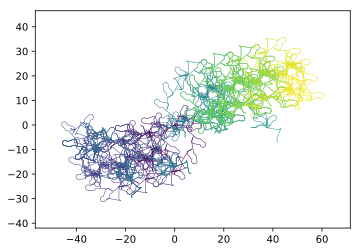

In [12]:

#rule = plant.copy()
#rule = penrose.copy()
hexknob = {'a': 50,
 'iter': 8,
 'rules': {'F': 'P-FIT+I-P',
           'I': 'TF',
           'O': '[I][[FF]P]PP',
           'P': '+-O',
           'T': 'FFFP'},
 'start': 'TPIOT'}
rule = hexknob.copy()
rule['iter']=7
lsystem = Lsystem.from_lsbot(**rule)
series = lsystem.interpret(rule['iter'] - 1)
series = [list(zip(*s)) for s in series]
plot_series(series, linewidth=0.5)
pprint(rule)
